# Assignment 3 - Supervised Learning

## Zhenhua Wang
Netid:  zw149

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a) $f(x^{(i)}) = \prod_{i = 1}^{N} (\hat y^{(i)})^{y^{(i)}} [1 - \hat y^{(i)}]^{1-y^{(i)}}$

(b) $x^{(i)}$ is the i-th observation of X. $y^{(i)}$ is the i-th observation of Y. $\hat y^{(i)}$ is the prediction for $x^{(i)}$

1. $\hat y^{(i)} = \sigma(\mathbf{w}^T \mathbf{x}^{(i)})$

2. $\mathbf{C}(w) = -\frac{1}{N}\sum_{i = 1}^{N} log f(x^{(i)}) = - \frac{1}{N} \sum_{i = 1}^{N} \big[ y^{(i)} log(\hat y^{(i)}) + (1 - y^{(i)})log(1-\hat y^{(i)}) \big]$

The vectorized version: $\mathbf{C}(w) = -\frac{1}{N}Y^T log(\hat Y) - (1-Y)^T log(1 - \hat Y)$

(c) 

1. $\frac{\partial \hat y^{(i)}}{\partial w} = \hat y^{(i)} (1 - \hat y^{(i)})x^{(i)}$

2. $\nabla_{\mathbf{w}}C\\
\quad = -\frac{1}{N}\sum_{i = 1}^{N} \big[ \frac{y^{(i)}}{\hat y^{(i)}}\frac{\partial \hat y^{(i)}}{\partial w} - \frac{1-y^{(i)}}{1 - \hat y^{(i)}}\frac{\partial \hat y^{(i)}}{\partial w}\big]\\
\quad = -\frac{1}{N}\sum_{i = 1}^{N} \big[ (y^{(i)} - \hat y^{(i)}) x^{(i)} \big]\\
\quad = \frac{1}{N}\sum_{i = 1}^{N} \big[ (\hat y^{(i)} - y^{(i)}) x^{(i)} \big]\\
\quad = \left[ \frac{1}{N}\sum_{i = 1}^{N}\big[ (\hat y^{(i)} - y^{(i)}) x^{(i)}_{0} \big], \frac{1}{N}\sum_{i = 1}^{N}\big[ (\hat y^{(i)} - y^{(i)}) x^{(i)}_{1} \big], \frac{1}{N}\sum_{i = 1}^{N}\big[ (\hat y^{(i)} - y^{(i)}) x^{(i)}_{2} \big] \right]$ where $x^{(i)}_{j}$ is the i-th observation, j-th feature of X

(d)

$\mathbf{w} = \mathbf{w} - \eta \frac{1}{N}\sum_{i = 1}^{N} \big[ (\hat y^{(i)} - y^{(i)}) x^{(i)} \big]$

The vectorized version: $\mathbf{w} = \mathbf{w} - \eta \frac{1}{N}X^T(\hat Y - Y)$

In [1]:
# (e)
import pandas as pd
data = pd.read_csv("./data/A3_Q1_data.csv")
x = data[["x1", "x2"]].values
y = data["y"].values

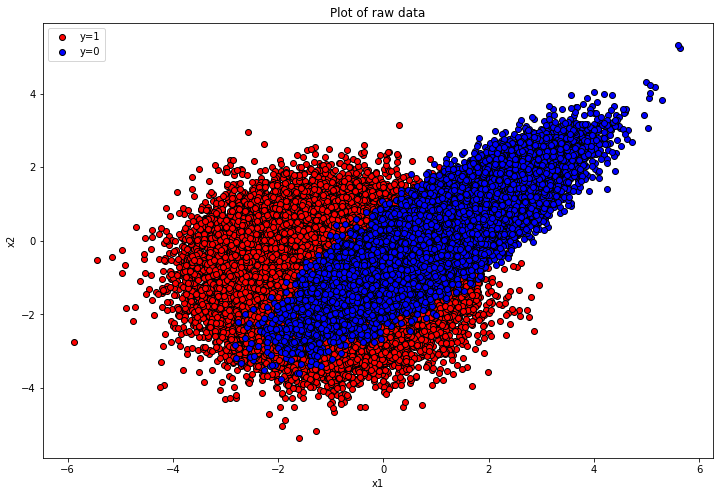

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
y1_s = plt.scatter(x[y == 1, 0], x[y == 1, 1], c="r", edgecolors="black", label = "y=1")
y2_s = plt.scatter(x[y == 0, 0], x[y == 0, 1], c="b", edgecolors="black", label = "y=0")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Plot of raw data")
plt.legend()
plt.show()

As we can see from the plot above, the data from two different classes are not separabal. #######Why logistic#######

In [3]:
# (f)
print("number of missing in each variable: ")
print(data.isnull().sum())
data.describe()

number of missing in each variable: 
x1    0
x2    0
y     0
dtype: int64


,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


As my code suggests, there is no missing value. However, the scale is different(e.g. x1's mean is 0.04, whereas x2's mean is -0.39). I would try normalize the data.

In [8]:
# (g)
from math import e
import numpy as np

class LogisticReg:
    def __init__(self):
        self.w = None
        self.train_cost_history = []
        self.test_cost_history = []
        self.e = None
    def sigmoid(self, z):
        return 1 / (1 + e**(-z))
    def cost(self, X, Y):
        num = len(Y)
        Y_hat = self.sigmoid(X.dot(self.w))
        c = - Y.T.dot(np.log(Y_hat)) - (1-Y).T.dot(np.log(1- Y_hat))
        return c / num
    
    def gradient(self, X, Y):
        Y_hat = self.sigmoid(X.dot(self.w))
        return (1/len(Y)) * X.T.dot(Y_hat - Y)
    
    def fit(self, x_train, y_train, x_test, y_test, lr, epoch=500, show_hist=True):
        # initialize weight
        self.w = np.random.rand(x_train.shape[1])
        
        self.e = 0
        while self.e <= epoch:
            current_w = self.w
            
            # cost
            c_train = self.cost(X=x_train, Y=y_train)
            c_test = self.cost(X=x_test, Y=y_test)
            self.train_cost_history.append(c_train)
            self.test_cost_history.append(c_test)
            
            if (self.e+1) % 50 == 0 and show_hist:
                print("epoch: {}, current train cost: {} , test cost: {}".format(self.e+1, c_train, c_test))
                pass
            
            # training
            y_hat = self.sigmoid(x_train.dot(self.w))
            grad = self.gradient(x_train, y_train)
            self.w = current_w - lr * grad
            
            self.e += 1
            if self.e != 0 and np.abs(np.linalg.norm(self.w, ord=2) - np.linalg.norm(current_w, ord=2)) < 1e-06:
                break
            pass
        print("trianing finished!")
        pass
    
    def predict(self, x):
        return self.sigmoid(x.dot(self.w))

In [122]:
# partition data
shuffle = np.arange(len(y))
np.random.shuffle(shuffle)

x_train_og = x[:70000]
y_train_og = y[:70000]

x_test_og = x[70000:]
y_test_og = y[70000:]

mu = x_train_og.mean(axis=0)
sig = x_train_og.std(axis=0)
x_train = (x_train_og - mu) / sig
x_test = (x_test_og - mu) / sig

# add bias term
x_train = np.column_stack((np.ones(len(x_train)),
                          x_train))
x_test = np.column_stack((np.ones(len(x_test)),
                          x_test))
y_train = y_train_og.copy()
y_test = y_test_og.copy()



In [511]:
logreg = LogisticReg()
logreg.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = 0.1)

epoch: 50, current train cost: 0.45604878305356283 , test cost: 0.4535105578376071
epoch: 100, current train cost: 0.38470824375442886 , test cost: 0.3817311135802815
epoch: 150, current train cost: 0.360492184093094 , test cost: 0.35733243444383567
epoch: 200, current train cost: 0.3486689531179911 , test cost: 0.3453933742374626
epoch: 250, current train cost: 0.3419391740385091 , test cost: 0.3385782147793604
epoch: 300, current train cost: 0.3377742370926545 , test cost: 0.3343458786552464
epoch: 350, current train cost: 0.33505794286892937 , test cost: 0.33157438278028295
epoch: 400, current train cost: 0.33322188285693594 , test cost: 0.3296921081812862
epoch: 450, current train cost: 0.3319482360537852 , test cost: 0.32837922538515035
epoch: 500, current train cost: 0.3310472774789623 , test cost: 0.327444641256484
trianing finished!


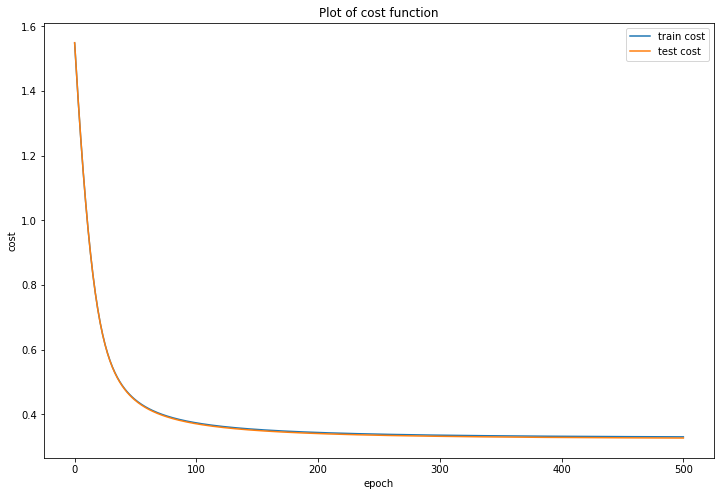

In [469]:
# (j)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
l_train, = plt.plot(range(logreg.e), logreg.train_cost_history, label = "train cost")
l_test, = plt.plot(range(logreg.e), logreg.test_cost_history, label = "test cost")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.title("Plot of cost function")
plt.legend(handles=[l_train, l_test])
plt.show()

trianing finished!
molde with lr = 0.01 trained! 
trianing finished!
molde with lr = 0.03 trained! 
trianing finished!
molde with lr = 0.06 trained! 
trianing finished!
molde with lr = 0.1 trained! 
trianing finished!
molde with lr = 0.3 trained! 
trianing finished!
molde with lr = 0.6 trained! 
trianing finished!
molde with lr = 1 trained! 
trianing finished!
molde with lr = 2 trained! 
trianing finished!
molde with lr = 5 trained! 
trianing finished!
molde with lr = 7 trained! 
trianing finished!
molde with lr = 8 trained! 


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


trianing finished!
molde with lr = 20 trained! 


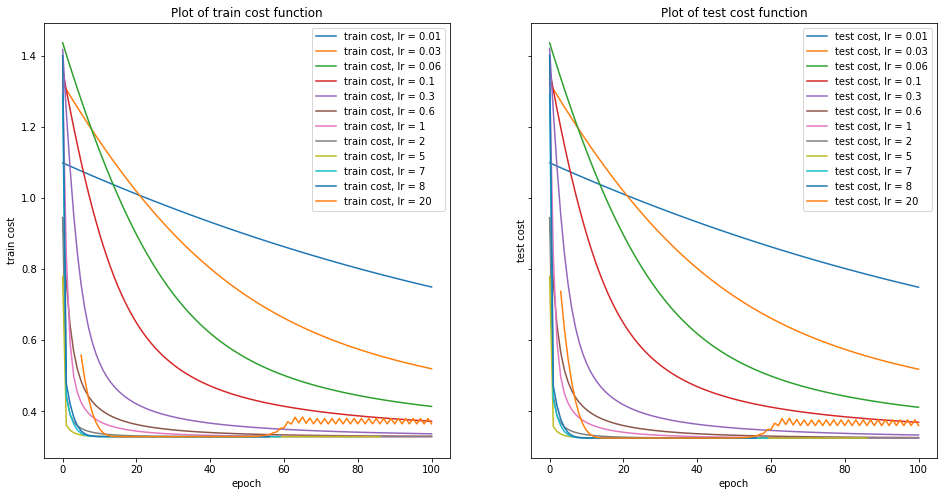

In [128]:
# (k)
lr_list = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 2, 5, 7, 8, 20]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 8))
epoch = 100
for lr in lr_list:
    logreg_lr = LogisticReg()
    logreg_lr.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = lr, epoch=epoch, show_hist=False)
    
    print("molde with lr = {} trained! ".format(lr))
    
    ax1.plot(range(logreg_lr.e), logreg_lr.train_cost_history, label = "train cost, lr = {}".format(lr))
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("train cost")
    ax1.set_title("Plot of train cost function")
    
    ax2.plot(range(logreg_lr.e), logreg_lr.test_cost_history, label = "test cost, lr = {}".format(lr))
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("test cost")
    ax2.set_title("Plot of test cost function")
ax1.legend()
ax2.legend()
f.show()

##### What is the impact that each parameter has on the process and the results? 
Learning rates controll the speed of updating parameters. As shown in the plots, when learning rate is small, the costs drop slowly (e.g. lr = 0.01, in our case). On the other hand, when learning rate is large, the costs drop fast. But when the learning rate exceeds a certain threshhold, it would go back and forth around the minimum, but never reach to the minimum (e.g. lr = 20, in our case).

##### What choices did you make in your chosen approach and why?
I choose 5 as the learning rate of my model, because our plot of **test** cost function shows that when leanring rate equals 5, it can go to the minimum and its updating speed is the fastest.

trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!


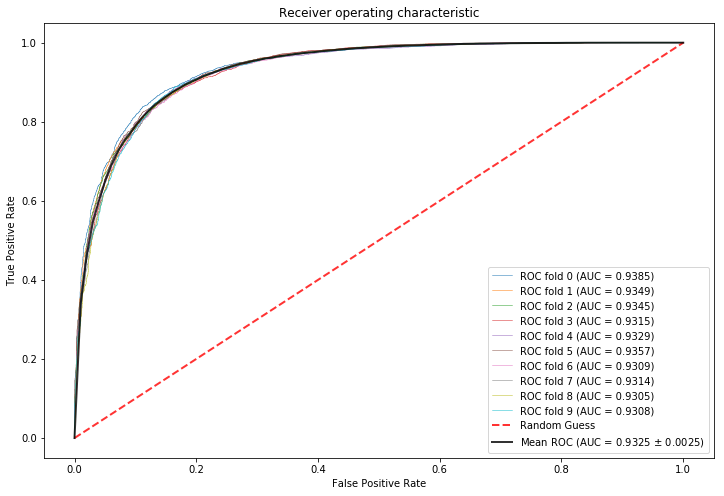

In [129]:
# (i) cross-validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
from scipy import interp

skf = StratifiedKFold(n_splits=10)
i = 0
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
plt.figure(figsize=(12, 8))

# partition the training data into training and validation set
for tr_index, val_index in skf.split(x_train_og, y_train_og):
    x_tr, x_val = x_train_og[tr_index], x_train_og[val_index]
    y_tr, y_val = y_train_og[tr_index], y_train_og[val_index]
    
    # normalize
    mu = x_tr.mean(axis=0)
    sig = x_tr.std(axis=0)
    x_tr = (x_tr - mu) / sig
    x_val = (x_val - mu) / sig

    # add bias term
    x_tr = np.column_stack((np.ones(len(x_tr)),
                              x_tr))
    x_val = np.column_stack((np.ones(len(x_val)),
                              x_val))
    
    logreg_cv = LogisticReg()
    logreg_cv.fit(x_train=x_tr, y_train=y_tr, x_test=x_val, y_test=y_val, lr = 5, show_hist=False)
    
    y_val_hat = logreg_cv.predict(x_val)
        
    fpr, tpr, thresholds = roc_curve(y_val, y_val_hat)
    roc_auc = auc(fpr, tpr)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, lw=0.5, alpha=1,
             label='ROC fold %d (AUC = %0.4f)' % (i, roc_auc))
    i += 1
    pass

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random Guess', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

(m)

##### Why do we use CV？
Cross-validation is a model evaluation method that is better than residuals

epoch: 50, current train cost: 0.3285433417628315 , test cost: 0.32470881213286307
trianing finished!


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


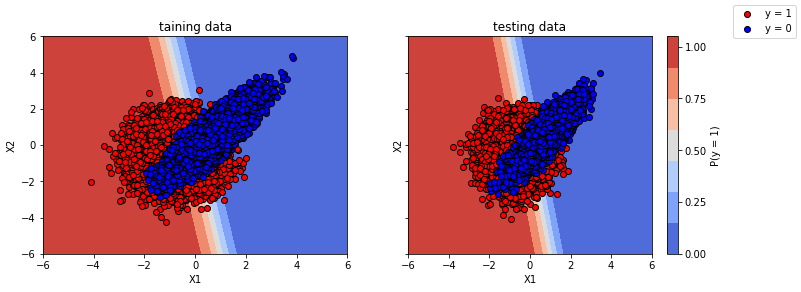

In [131]:
# (n)

# background
x1 = np.linspace(-6, 6, 300)
x2 = np.linspace(-6, 6, 300)

x1v, x2v = np.meshgrid(x1, x2)
X_mesh = np.column_stack((np.ones(len(x1v.ravel())),
                          x1v.ravel(),
                          x2v.ravel()))

logreg = LogisticReg()
logreg.fit(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test, lr = 5)

y_hat_mesh = logreg.predict(X_mesh)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
ax1.contourf(x1v, x2v, y_hat_mesh.reshape(x1v.shape), cmap="coolwarm")
ax1.scatter(x = x_train[y_train == 1,1], y = x_train[y_train == 1,2], c='r', edgecolors="black", label = "y = 1")
ax1.scatter(x = x_train[y_train == 0,1], y = x_train[y_train == 0,2], c='b', edgecolors="black", label = "y = 0")
ax1.set_xlim(x1v.min(), x1v.max())
ax1.set_ylim(x2v.min(), x2v.max())
ax1.set_xlabel("X1")
ax1.set_ylabel("X2")
ax1.set_title("taining data")

c2 = ax2.contourf(x1v, x2v, y_hat_mesh.reshape(x1v.shape), cmap="coolwarm")
ax2.scatter(x = x_test[y_test == 1,1], y = x_test[y_test == 1,2], c='r', edgecolors="black")
ax2.scatter(x = x_test[y_test == 0,1], y = x_test[y_test == 0,2], c='b', edgecolors="black")
ax2.set_xlim(x1v.min(), x1v.max())
ax2.set_ylim(x2v.min(), x2v.max())
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title("testing data")
cb = f.colorbar(c2)
cb.set_label("P(y = 1)")
cb.set_ticks([0, .25, .5, .75, 1])
f.legend()
f.show()

##### Comment on your decision boundary. Could it be improved?
The linear boundry does not seem to seperrate the data accurately. Yes, it can be improved. We might try to transform our data(e.g. adding qudratic terms).

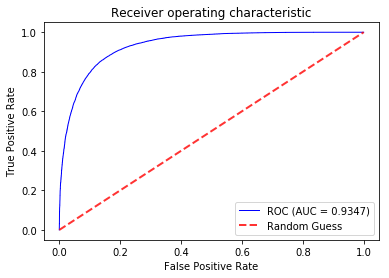

In [132]:
# (o)

y_test_hat = logreg.predict(x_test)

fpr, tpr, thresholds = roc_curve(y_test, y_test_hat)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, lw=1, alpha=1, color='b',
             label='ROC (AUC = %0.4f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random Guess', alpha=.8)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [141]:
# What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?
print('area under the curve (AUC) = {:.4f}'.format(roc_auc), ", which is far more better than random guess!")

area under the curve (AUC) = 0.9347 , which is far more better than random guess!


## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [20]:
# (a)
from keras.datasets import mnist
(x_train, y_train_orginal), (x_test, y_test_orginal) = mnist.load_data()

y_train = y_train_orginal.copy()
y_test = y_test_orginal.copy()

y_train[y_train != 3] = 0
y_train[y_train == 3] = 1

y_test[y_test != 3] = 0
y_test[y_test == 3] = 1

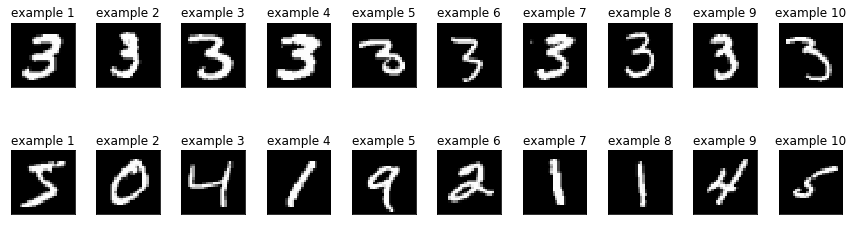

In [21]:
# (b)
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
for i in range(10):
    x_tr1 = x_train[y_train == 1][i]
    x_tr0 = x_train[y_train == 0][i]
    plt.subplot(2, 10, i+1)
    plt.imshow(x_tr1, cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.title("example {}".format(i + 1))
    plt.subplot(2, 10, i+11)
    plt.imshow(x_tr0, cmap="gray")
    plt.title("example {}".format(i + 1))
    plt.yticks([])
    plt.xticks([])
plt.tight_layout()

In [374]:
# (c)
print("We have {0} number of class 1, and {1} number of class 2".format(len(y_train[y_train == 1]), len(y_train[y_train == 0])))

We have 6131 number of class 1, and 53869 number of class 2


The data is not balenced, because the data labeled "3" is only $\frac{1}{10}$ of the original dataset.

Machine learning model will be biased by unbiased classes. Model would prefer more common class.

trianing finished!
trianing finished!
trianing finished!
trianing finished!
trianing finished!


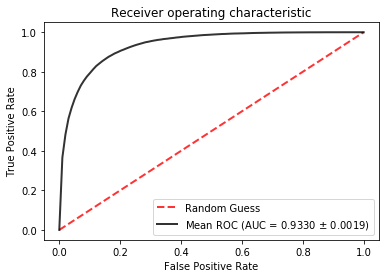

In [475]:
# (d)
x_train_ravel = np.zeros((len(y_train), 784))
x_test_ravel = np.zeros((len(y_test), 784))

for i in range(len(y_train)):
    x_train_ravel[i] = x_train[i].ravel()
for i in range(len(y_test)):
    x_test_ravel[i] = x_test[i].ravel()

skf = StratifiedKFold(n_splits=5)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
# partition the training data into training and validation set
for tr_index, val_index in skf.split(x_train_ravel, y_train):
    x_tr, x_val = x[tr_index], x[val_index]
    y_tr, y_val = y[tr_index], y[val_index]

    logreg_cv = LogisticReg()
    logreg_cv.fit(x_train=x_tr, y_train=y_tr, x_test=x_val, y_test=y_val, lr = 5)
    
    y_val_hat = logreg_cv.predict(x_val)
        
    fpr, tpr, thresholds = roc_curve(y_val, y_val_hat)
    roc_auc = auc(fpr, tpr)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    pass

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',
         label=r'Mean ROC (AUC = %0.4f $\pm$ %0.4f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

# chance curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Random Guess', alpha=.8)

plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

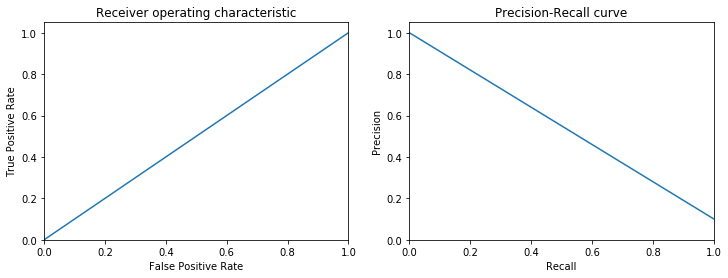

In [535]:
# all not 3
from sklearn.metrics import precision_recall_curve

y_hat_not_3 = np.zeros(len(y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_hat_not_3).ravel()

plt.figure(figsize=(12, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_hat_not_3)
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.subplot(1, 2, 2)
precision, recall, thresholds = precision_recall_curve(y_test, y_hat_not_3)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)**



In [5]:
# loading data
from scipy import io as spio

In [6]:
letters = spio.loadmat("data/matlab/emnist-letters.mat")

In [23]:
# load training dataset
x_train = letters["dataset"][0][0][0][0][0][0]
x_train = x_train.astype(np.float32)

# load training labels
y_train = letters["dataset"][0][0][0][0][0][1]

# load test dataset
x_test = letters["dataset"][0][0][1][0][0][0]
x_test = x_test.astype(np.float32)

# load test labels
y_test = letters["dataset"][0][0][1][0][0][1]

x_train = x_train.reshape(x_train.shape[0], 1, 28, 28, order="A")
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28, order="A")

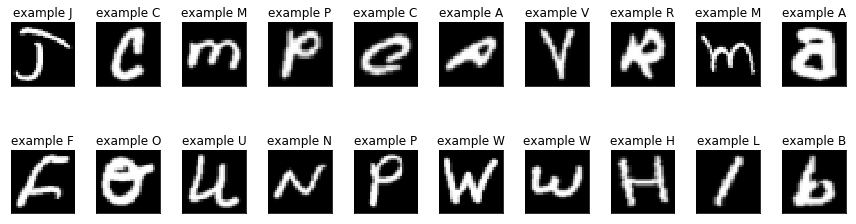

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
for i in range(10):
    l = np.random.randint(low = 1, high=26, size=2)
    x_tr1 = x_train[y_train == l[0]][i]
    x_tr0 = x_train[y_train == l[1]][i]
    plt.subplot(2, 10, i+1)
    plt.imshow(x_tr1, cmap="gray")
    plt.yticks([])
    plt.xticks([])
    plt.title("example {}".format(chr(65 - 1 + y_train[y_train == l[0]][i])))
    plt.subplot(2, 10, i+11)
    plt.imshow(x_tr0, cmap="gray")
    plt.title("example {}".format(chr(65 - 1 + y_train[y_train == l[1]][i])))
    plt.yticks([])
    plt.xticks([])
plt.tight_layout()

In [95]:
# flatten
x_train_ravel = np.zeros((len(y_train), np.prod(x_train.shape[1:])))
x_test_ravel = np.zeros((len(y_test), np.prod(x_test.shape[1:])))

for i in range(len(y_train)):
    x_train_ravel[i] = x_train[i].ravel()
for i in range(len(y_test)):
    x_test_ravel[i] = x_test[i].ravel()

In [99]:
y_train_ravel = y_train.ravel()
y_test_ravel = y_test.ravel()

In [96]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=70).fit_transform(x_train_ravel)
reduced_test_data = PCA(n_components=70).fit_transform(x_test_ravel)

In [97]:
pca = PCA(n_components=70)
pca.fit(x_train_ravel)

0.9042101126241462


In [105]:
print(np.sum(pca.explained_variance_ratio_))

0.9042101126241462


In [104]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',
                         multi_class='multinomial', max_iter=1000).fit(reduced_data, y_train_ravel)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [108]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(reduced_data, y_train_ravel)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [109]:
y_hat = clf.predict(reduced_test_data)

In [119]:
i = 213
y_hat[i], y_test[i]

(21, array([1], dtype=uint8))

In [103]:
from sklearn.metrics import roc_auc_score

print("logistic regression: ",roc_auc_score(y_test_ravel, y_hat))

ValueError: multiclass format is not supported